### 2T - NaiveBayes

Maestrante: Daniel Patricio Olivera Flores
 
Dataset: https://www.kaggle.com/competitions/playground-series-s3e14

 Contenido del Dataframe:

* Descripción de las Características
* Clonesize m2 - El tamaño promedio del clon de arándano en el campo
* Honeybee abejas/m2/min - Densidad de abejas melíferas en el campo
* Bumbles abejas/m2/min - Densidad de abejorros en el campo
* Andrena abejas/m2/min - Densidad de abejas Andrena en el campo
* Osmia abejas/m2/min - Densidad de abejas Osmia en el campo
* MaxOfUpperTRange ℃ - El registro más alto de la temperatura diaria del aire en la banda superior durante la temporada de floración
* MinOfUpperTRange ℃ - El registro más bajo de la temperatura diaria del aire en la banda superior
* AverageOfUpperTRange ℃ - El promedio de la temperatura diaria del aire en la banda superior
* MaxOfLowerTRange ℃ - El registro más alto de la temperatura diaria del aire en la banda inferior durante la temporada de floración
* MinOfLowerTRange ℃ - El registro más bajo de la temperatura diaria del aire en la banda inferior
* AverageOfLowerTRange ℃ - El promedio de la temperatura diaria del aire en la banda inferior
* RainingDays Day - El número total de días durante la temporada de floración, cada uno de los cuales tiene precipitaciones mayores a cero
* AverageRainingDays Day - El promedio de días lluviosos de toda la temporada de floración
* Fruitset
* Fruitmass
* Seeds
* Yield - Produccion en base a la media de Kilogramos/Ha (Produccion Alta, Produccion Baja)

In [21]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, auc, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [2]:
def descomprimir_y_cargar_csv(archivo_zip, directorio_destino='.'):
    dataframes = {}

    with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
        zip_ref.extractall(directorio_destino)

        for nombre_archivo in zip_ref.namelist():
            if nombre_archivo.endswith('.csv'):
                nombre_variable = os.path.splitext(os.path.basename(nombre_archivo))[0]
                ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
                dataframes[nombre_variable] = pd.read_csv(ruta_archivo)
    
    return dataframes


In [3]:
archivo_zip = 'playground-series-s3e14.zip'
dataframes = descomprimir_y_cargar_csv(archivo_zip)
print(dataframes.keys())


dict_keys(['sample_submission', 'test', 'train'])


In [8]:
df_train_cat= dataframes['train']

if 'id' in df_train_cat.columns:
    df_train_cat.drop(['id'], axis=1, inplace=True)
else:
    print("No se encontró la columna 'id'")
mean_yield = df_train_cat["yield"].mean()
print(f"Rendimiento promedio: {mean_yield:.2f}"+"[Kg/Ha]")
y_cat = df_train_cat["yield"]
y_cat = np.where(y_cat <= mean_yield, "Baja", "Alta")
print(y_cat)
print('Shape of y: {}'.format(y_cat.shape))
y_cat = pd.DataFrame(y_cat, columns=["yield"])
y_cat.value_counts()

df_train_cat['yield'] = y_cat
le = LabelEncoder()
le.fit(df_train_cat['yield'])
df_train_cat['yield'] = le.transform(df_train_cat['yield'])
df_train_cat.head(5)

No se encontró la columna 'id'
Rendimiento promedio: 6025.19[Kg/Ha]
['Baja' 'Baja' 'Alta' ... 'Baja' 'Alta' 'Baja']
Shape of y: (15289,)


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,1
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,1
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,0
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,0
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,0


In [9]:
print("El dataset train tiene: {} filas y {} columnas".format(df_train_cat.shape[0], df_train_cat.shape[1]))
df_head_train = df_train_cat.head()
df_describe_train = df_train_cat.describe()
print(df_head_train, "\n")
print(df_describe_train)

El dataset train tiene: 15289 filas y 17 columnas
   clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0       25.0      0.50     0.25     0.75   0.50              69.7   
1       25.0      0.50     0.25     0.50   0.50              69.7   
2       12.5      0.25     0.25     0.63   0.63              86.0   
3       12.5      0.25     0.25     0.63   0.50              77.4   
4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRai

In [11]:
print(df_train_cat.dtypes,'\n')
valores_nulos_train = df_train_cat.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos_train)
total_valores_nulos_train = valores_nulos_train.sum()
if total_valores_nulos_train > 0:
    print(f"Total de valores nulos en el DataFrame: {total_valores_nulos_train}")
else:
    print("No existen valores nulos en el DataFrame.")

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                     int32
dtype: object 

Cantidad de valores nulos por columna:
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds      

In [12]:
def calcular_varianza(dataframe):
    varianza = dataframe.var()
    varianza = varianza.apply(lambda x: format(x, '.10f'))
    return varianza

varianzas = calcular_varianza(df_train_cat)
print(varianzas)

clonesize                43.4968062371
honeybee                  0.1307857308
bumbles                   0.0035900360
andrena                   0.0219380587
osmia                     0.0194571891
MaxOfUpperTRange         83.6621674453
MinOfUpperTRange         30.7626082856
AverageOfUpperTRange     58.3972216183
MaxOfLowerTRange         43.7005560460
MinOfLowerTRange         10.2103675902
AverageOfLowerTRange     29.0579781339
RainingDays             135.8992221984
AverageRainingDays        0.0268647861
fruitset                  0.0055338127
fruitmass                 0.0013716129
seeds                    16.2496593182
yield                     0.2495686200
dtype: object


El conjunto de datos entregados para la compentencia/estudio cuenta con 3 datos tabulares dict_keys(['sample_submission', 'test', 'train']), donde se tiene dividido el test.csv y el train.csv en dos sets de datos tabulares, sample_submission es un ejemplo de como entregar el test.csv a Kaggle por lo que no se tomara en cuenta para realizar el EDA, tambien hay que tomar en consideracion que solamente train.csv tiene la caracteristica yield entre sus features.

Linear Regression 1, así como Linear Regression 2, Ridge & Lasso no son buenos modelos para la predicción de producción de kilogramos de arándanos por hectarea ['yield']

### BernoulliNB, MultinomialNB, GaussianNB, Logistic Regression, LDA & QDA

Pasaré de un dataset de regresión a uno de clasificación organizando el campo 'yield' en categorías según la producción de kilogramos por hectárea a dos categorías, baja producción y alta producción, tomando la media de 'yield' como umbral de separación.

In [35]:
def scatter_plots_yield_vs_features(df, target_col='yield'):
    features = [col for col in df.columns if col != target_col]
    n_cols = 4
    n_rows = (len(features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.scatterplot(data=df, x=feature, y=target_col, hue=target_col, palette='YlOrRd', ax=ax)
        ax.grid(True)
        ax.set_title(f'{target_col} vs {feature}')

    plt.tight_layout()
    plt.show()

In [16]:
def plot_jointplot(df, y_col, columns, kinds):
    for column in columns:
        sns.jointplot(data=df, x=column, y=y_col, kind=kinds, cmap='YlOrRd', fill=True)
        plt.xlabel(column)
        plt.ylabel(y_col)
        plt.show()

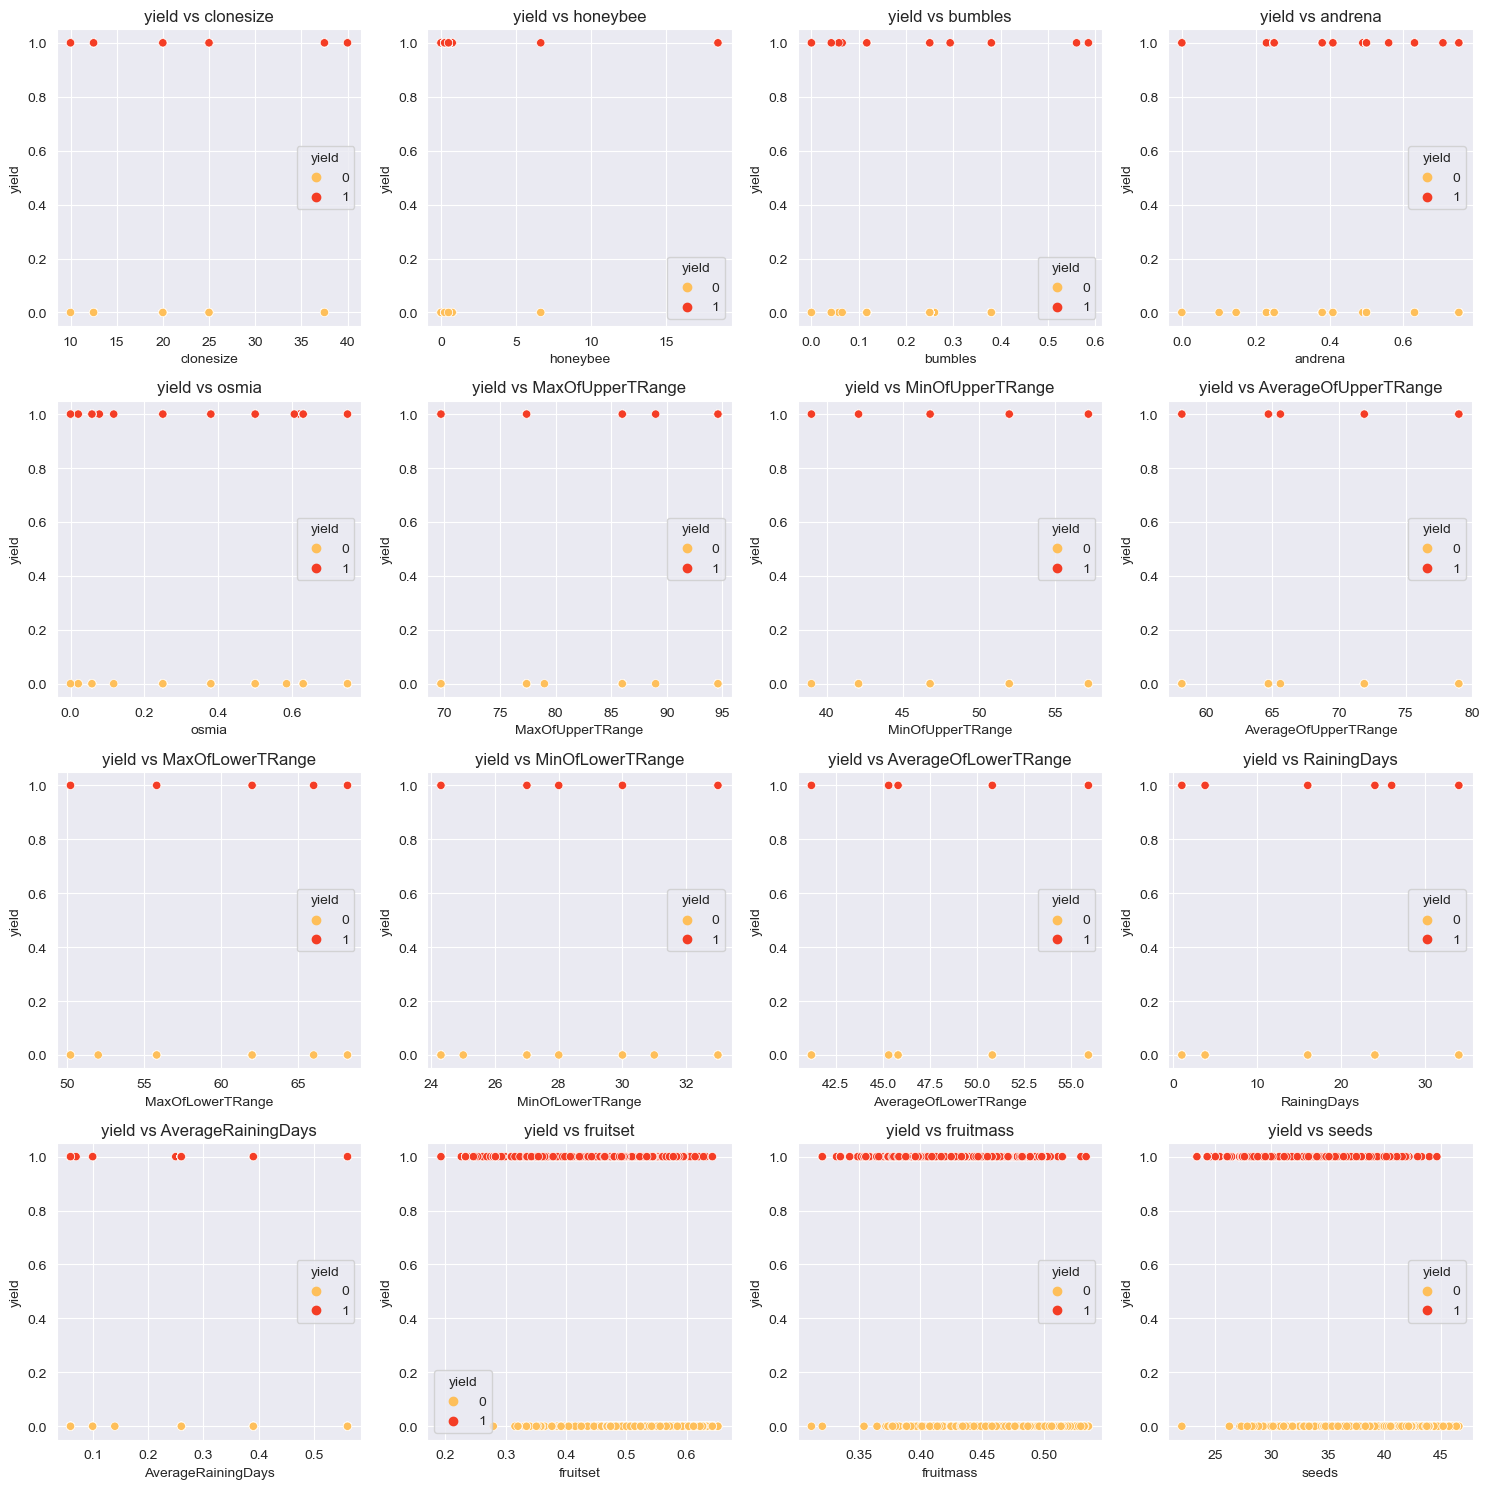

In [36]:
scatter_plots_yield_vs_features(df_train_cat, target_col='yield')

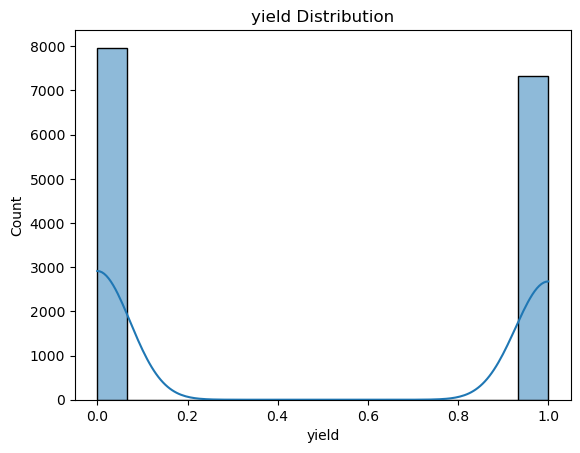

In [15]:
target_col_cat = 'yield'
sns.histplot(df_train_cat[target_col_cat], kde=True)
plt.title(f'{target_col_cat} Distribution')
plt.show()

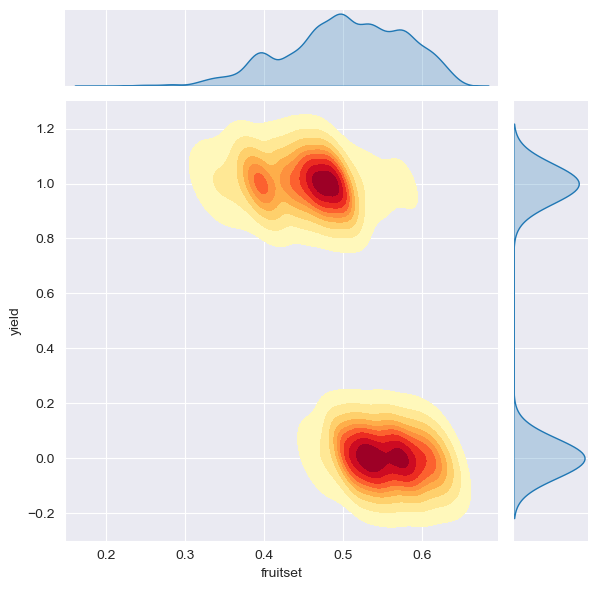

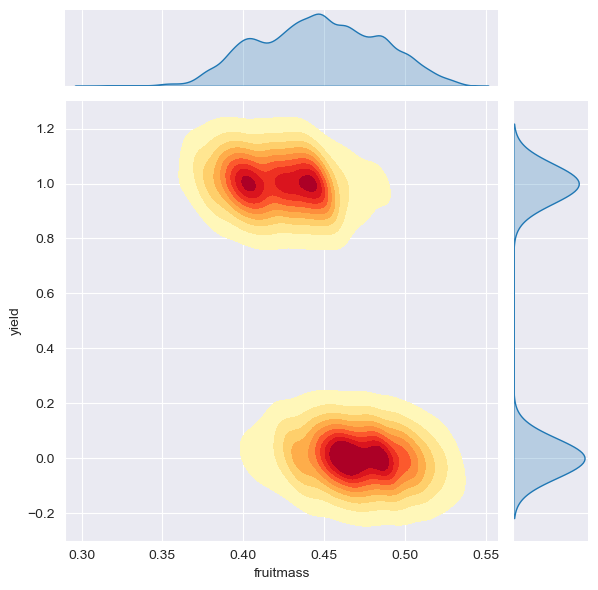

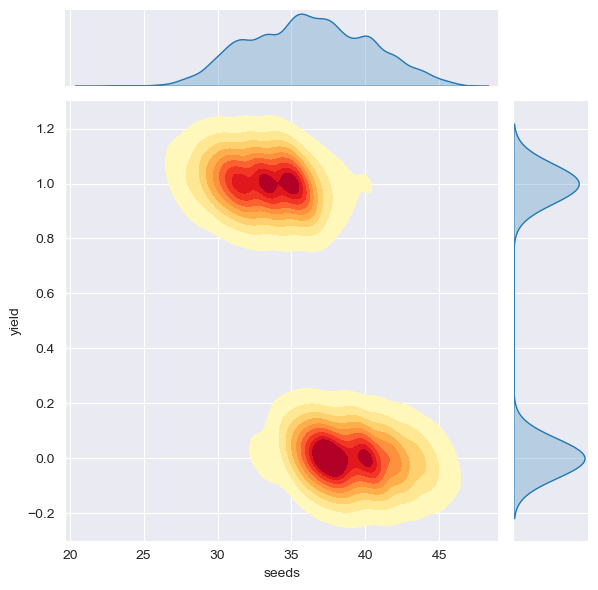

In [32]:
columnas_cat = df_train_cat.iloc[:, -4:-1].columns
plot_jointplot(df_train_cat, 'yield', columnas_cat,'kde')

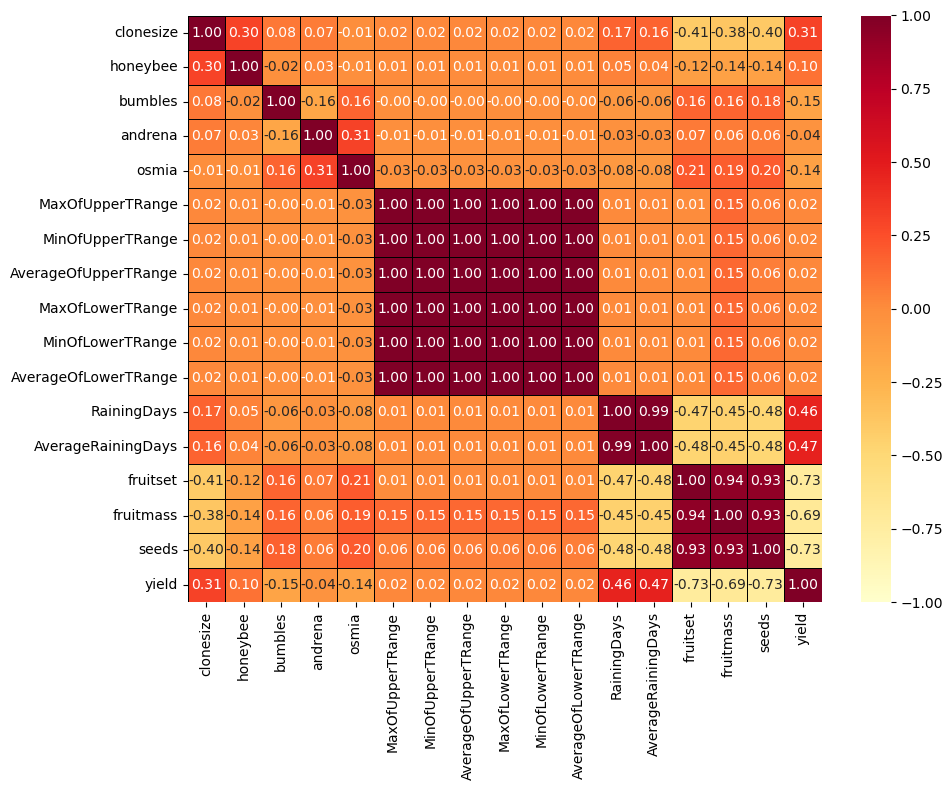

In [19]:
def graficar_correlaciones_cat(df1):
    corr1 = df1.corr()
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
    sns.heatmap(corr1, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, ax=ax1, fmt='.2f', linewidths=0.5, linecolor="black")
    plt.tight_layout()
    plt.show()
    
graficar_correlaciones_cat(df_train_cat)

### BernoulliNB, GaussianNB

In [22]:
def standardize_and_normalize(df):
    scaler_std = StandardScaler()
    df_standardized = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

    scaler_norm = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler_norm.fit_transform(df), columns=df.columns)

    return df_standardized, df_normalized, scaler_std, scaler_norm

In [23]:
df_train_std_cat, df_train_norm_cat, scaler_std_train_cat, scaler_norm_train_cat = standardize_and_normalize(df_train_cat)
df_train_std_cat['yield'] = df_train_std_cat['yield'] * scaler_std_train_cat.scale_[-1] + scaler_std_train_cat.mean_[-1]

X_cat = df_train_std_cat.drop('yield', axis=1)
y_cat = df_train_std_cat['yield']

print('Shape of X: {}'.format(X_cat.shape))
print('Shape of y: {}'.format(y_cat.shape))
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=957)
print("Instancias X_train (category) dataset: ", X_train_cat.shape)
print("Instancias y_train (category) dataset: ", y_train_cat.shape)
print("Instancias X_test (category) dataset: ", X_test_cat.shape)
print("Instancias y_test (category) dataset: ", y_test_cat.shape,'\n')

Shape of X: (15289, 16)
Shape of y: (15289,)
Instancias X_train (category) dataset:  (12231, 16)
Instancias y_train (category) dataset:  (12231,)
Instancias X_test (category) dataset:  (3058, 16)
Instancias y_test (category) dataset:  (3058,) 



In [24]:
def naive_bayes_classification_cv(X_train, y_train, X_test, y_test, cv=10):
    
    bernoulli_nb = BernoulliNB()
    bernoulli_nb.fit(X_train, y_train)
    
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(X_train, y_train)
 
    for model_name, model in [('BernoulliNB', bernoulli_nb), ('GaussianNB', gaussian_nb)]:

        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        print(f"{model_name}:")
        print(f"  Cross-validation Scores: {scores}")
        print(f"  Mean Accuracy: {scores.mean():.2f}")
        print(f"  Standard Deviation: {scores.std():.2f}\n")
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"  Test Accuracy: {accuracy:.2f}")
        print(f"  Test Precision: {precision:.2f}")
        print(f"  Test Recall: {recall:.2f}")
        print(f"  Test F1 Score: {f1:.2f}\n")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Precision:",accuracy_score(y_test, y_pred)*100,"%\n")

    return bernoulli_nb, gaussian_nb

bernoulli_NB, gaussian_NB = naive_bayes_classification_cv(X_train_cat, y_train_cat, X_test_cat, y_test_cat)

BernoulliNB:
  Cross-validation Scores: [0.89379085 0.88716271 0.88470973 0.9002453  0.90923957 0.91741619
 0.91578087 0.90106296 0.89452167 0.90351594]
  Mean Accuracy: 0.90
  Standard Deviation: 0.01

  Test Accuracy: 0.90
  Test Precision: 0.88
  Test Recall: 0.90
  Test F1 Score: 0.89

[[1434  175]
 [ 138 1311]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1609
         1.0       0.88      0.90      0.89      1449

    accuracy                           0.90      3058
   macro avg       0.90      0.90      0.90      3058
weighted avg       0.90      0.90      0.90      3058

Precision: 89.76455199476783 %

GaussianNB:
  Cross-validation Scores: [0.86601307 0.87653312 0.87653312 0.89697465 0.90269828 0.8896157
 0.88634505 0.88062142 0.88470973 0.87326247]
  Mean Accuracy: 0.88
  Standard Deviation: 0.01

  Test Accuracy: 0.88
  Test Precision: 0.89
  Test Recall: 0.85
  Test F1 Score: 0.87

[[1461  148]
 [ 212 1237]]
       

In [25]:
def plot_roc_auc(model, X_train, y_train, X_test, y_test):
    
    sns.set_style("darkgrid")
    tmp = model.fit(X_train, y_train.ravel())
    ##y_pred_sample_score = tmp.decision_function(X_test)
    if hasattr(tmp, "decision_function"):
        y_pred_sample_score = tmp.decision_function(X_test)
    else:
        y_pred_sample_score = tmp.predict_proba(X_test)[:, 1]
    logit_roc_auc = roc_auc_score(y_test, y_pred_sample_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
    plt.figure()
    plt.plot(fpr, tpr, label='{name} Model (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

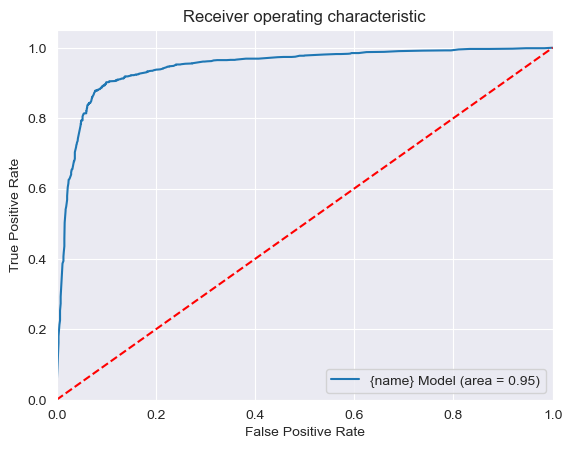

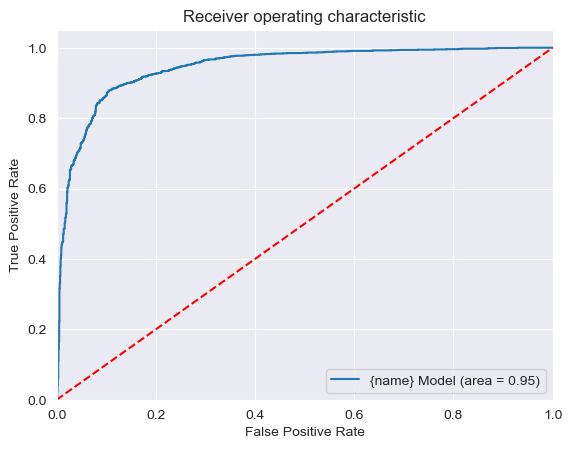

In [26]:
plot_roc_auc(bernoulli_NB, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
plot_roc_auc(gaussian_NB, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

### MultinomialNB

In [27]:
X_cat_norm = df_train_norm_cat.drop('yield', axis=1)
y_cat_norm = df_train_norm_cat['yield']
print('Shape of X: {}'.format(X_cat_norm.shape))
print('Shape of y: {}'.format(y_cat_norm.shape))
X_train_cat_norm, X_test_cat_norm, y_train_cat_norm, y_test_cat_norm = train_test_split(X_cat_norm, y_cat_norm, test_size=0.2, random_state=957)
print("Instancias X_train (category) dataset: ", X_train_cat_norm.shape)
print("Instancias y_train (category) dataset: ", y_train_cat_norm.shape)
print("Instancias X_test (category) dataset: ", X_test_cat_norm.shape)
print("Instancias y_test (category) dataset: ", y_test_cat_norm.shape,'\n')
df_train_norm_cat.head(5)

Shape of X: (15289, 16)
Shape of y: (15289,)
Instancias X_train (category) dataset:  (12231, 16)
Instancias y_train (category) dataset:  (12231,)
Instancias X_test (category) dataset:  (3058, 16)
Instancias y_test (category) dataset:  (3058,) 



,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0.500000,0.027130,0.42735,1.000000,0.666667,0.000000,0.170330,0.000000,0.000000,0.000000,0.000000,0.69697,0.66,0.505601,0.472087,0.423640,1.0
1,0.500000,0.027130,0.42735,0.666667,0.666667,0.000000,0.170330,0.000000,0.000000,0.000000,0.000000,0.69697,0.66,0.548911,0.492226,0.480664,1.0
2,0.083333,0.013565,0.42735,0.840000,0.840000,0.654618,0.714286,0.658654,0.655556,0.655172,0.653061,0.69697,0.66,0.784034,0.710344,0.663619,0.0
3,0.083333,0.013565,0.42735,0.840000,0.666667,0.309237,0.428571,0.312500,0.311111,0.310345,0.312925,0.69697,0.66,0.812440,0.742898,0.709558,0.0
4,0.500000,0.027130,0.42735,0.840000,0.840000,0.309237,0.428571,0.312500,0.311111,0.310345,0.312925,0.69697,0.66,0.842261,0.814536,0.751056,0.0


In [28]:
def multinomial_naive_bayes_classification_cv(X_train, y_train, X_test, y_test, cv=10):
    
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(X_train, y_train)
    
 
    for model_name, model in [('BernoulliNB', multinomial_nb)]:

        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        print(f"{model_name}:")
        print(f"  Cross-validation Scores: {scores}")
        print(f"  Mean Accuracy: {scores.mean():.2f}")
        print(f"  Standard Deviation: {scores.std():.2f}\n")
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"  Test Accuracy: {accuracy:.2f}")
        print(f"  Test Precision: {precision:.2f}")
        print(f"  Test Recall: {recall:.2f}")
        print(f"  Test F1 Score: {f1:.2f}\n")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Precision:",accuracy_score(y_test, y_pred)*100,"%\n")

    return multinomial_nb

multinomial_NB = multinomial_naive_bayes_classification_cv(X_train_cat_norm, y_train_cat_norm, X_test_cat_norm, y_test_cat_norm)

BernoulliNB:
  Cross-validation Scores: [0.78186275 0.79558463 0.78740801 0.79231398 0.81030253 0.80294358
 0.79476697 0.7939493  0.79640229 0.79476697]
  Mean Accuracy: 0.80
  Standard Deviation: 0.01

  Test Accuracy: 0.80
  Test Precision: 0.81
  Test Recall: 0.75
  Test F1 Score: 0.78

[[1354  255]
 [ 360 1089]]
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      1609
         1.0       0.81      0.75      0.78      1449

    accuracy                           0.80      3058
   macro avg       0.80      0.80      0.80      3058
weighted avg       0.80      0.80      0.80      3058

Precision: 79.88881621975146 %



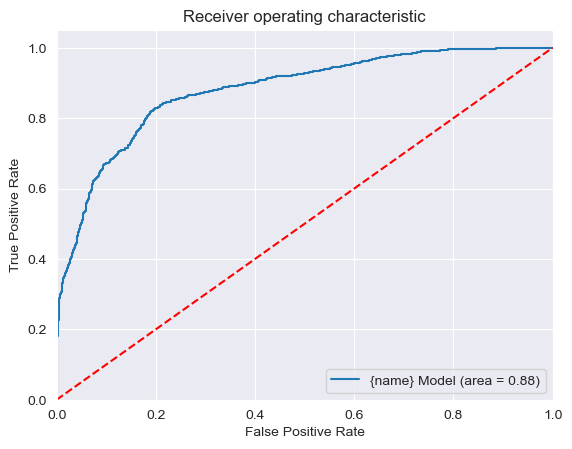

In [29]:
plot_roc_auc(multinomial_NB, X_train_cat_norm, y_train_cat_norm, X_test_cat_norm, y_test_cat_norm)